Código para treino de modelo e testes

https://towardsdatascience.com/extracting-song-data-from-the-spotify-api-using-python-b1e79388d50

https://towardsdatascience.com/predicting-the-music-mood-of-a-song-with-deep-learning-c3ac2b45229e

https://sites.tufts.edu/eeseniordesignhandbook/2015/music-mood-classification/

https://scholar.smu.edu/cgi/viewcontent.cgi?article=1197&context=datasciencereview

In [1]:
import pandas as pd
import numpy as np
import librosa as lr
import matplotlib.pyplot as plt
import os

import lyricsgenius

# Features do spotify
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

from craiyon import Craiyon
from PIL import Image # pip install pillow
from io import BytesIO
import base64

from statistics import mode

In [2]:
# Funções do código

def letra(title, artist):
    api_key='ORBJc-e5kH3LA_H5KohP8Grgp_YCbaBZgqz536TachvT1_iX7mPPwU3WrADiJ8Nw'
    genius= lyricsgenius.Genius(api_key)
    #title="Clube Da Esquina Nº 2"
    #artist="Milton Nascimento"
    song = genius.search_song(title=title, artist=artist)
    print(song.lyrics)
    return song.lyrics

def features_musicais():
    artist = input("Digite o nome da banda/artista: ")
    title = input("Digite o nome da música (ou palavra chave): ")
    
    df_nova_mus = pd.DataFrame(columns=['name','artist','uri','danceability', 'acousticness', 'energy', 'instrumentalness','liveness', 'valence', 'loudness', 'speechiness', 'tempo'])
    
    # Make your own Spotify app at https://beta.developer.spotify.com/dashboard/applications
    client_id = '0cbd7765b9634995877c5d78e483bf07'
    client_secret = 'f5e3b60f8471408eb6f195734ff8a775'

    client_credentials_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
    sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)
    sp.trace=False
    search_querry = artist + ' ' + title
    result = sp.search(search_querry)

    # Pega o primeiro resultado da busca
    prim_resp = result['tracks']['items'][0]
    uri = prim_resp['uri']
    features = sp.audio_features(uri)
    #print(features[0])

    print("Nome da música selecionada: ",prim_resp['name'])
    print("Nome do artista: ",prim_resp['artists'][0]['name'])
    #print(uri)

    # Informações da música
    df_nova_mus.loc[0,'name'] = prim_resp['name']
    df_nova_mus.loc[0,'artist'] = prim_resp['artists'][0]['name']
    df_nova_mus.loc[0,'uri'] = uri

    # Puxar as features: 'danceability', 'acousticness', 'energy', 'instrumentalness','liveness', 'valence', 'loudness', 
    # 'speechiness', 'tempo'
    df_nova_mus.loc[0,'danceability'] = features[0]['danceability']
    df_nova_mus.loc[0,'acousticness'] = features[0]['acousticness']
    df_nova_mus.loc[0,'energy'] = features[0]['energy']
    df_nova_mus.loc[0,'instrumentalness'] = features[0]['instrumentalness']
    df_nova_mus.loc[0,'liveness'] = features[0]['liveness']
    df_nova_mus.loc[0,'valence'] = features[0]['valence']
    df_nova_mus.loc[0,'loudness'] = features[0]['loudness']
    df_nova_mus.loc[0,'speechiness'] = features[0]['speechiness']
    df_nova_mus.loc[0,'tempo'] = features[0]['tempo']
    
    return df_nova_mus

def carregar_modelo(nome_modelo):
    with open("{}.pkl".format(nome_modelo), "rb") as f:
        model = pickle.load(f)
    
    return model

def classificar_musica(modelo, df_nova_mus):
    new = df_nova_mus[['danceability', 'acousticness', 'energy', 'instrumentalness',
                       'liveness', 'valence', 'loudness', 'speechiness', 'tempo']]
    m = modelo.predict(new)[0]
    dic = {0:"Calm",1:"Energetic",2:"Happy",3:"Sad"}
    mood = dic[m]
    print("Sua música foi classificada como: ", mood)
    
    return mood

def gerar_imagens():
    cwd = os.getcwd()
    target_dir = cwd +'/imagens'
    target_dir
    #os.mkdir(target_dir)

    # Checar se a pasta já existe
    os.path.exists(target_dir)

    os.chdir(target_dir)
    
    generator = Craiyon() # Instantiates the api wrapper
    result = generator.generate("happy mamma mia")
    result.save_images(r"C:\Users\sara-\OneDrive\Área de Trabalho\UNICAMP\Computação afetiva\Projeto final\imagens") 
    # Saves the generated images to 'current working directory/generated', you can also provide a custom pa
    
    print("Imagens salvas na pasta de imagens")
    
def palavra_freq():
    test_list = df['lyrics'][16].split()

    temp = [wrd for sub in test_list for wrd in sub.split()]

    # getting frequency
    res = mode(temp)
    print(test_list,temp,res)
    return

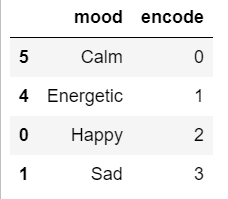

In [290]:
cwd = os.getcwd()
target_dir = cwd +'/imagens'
target_dir
#os.mkdir(target_dir)

# Checar se a pasta já existe
os.path.exists(target_dir)

os.chdir(target_dir)

In [59]:
generator = Craiyon() # Instantiates the api wrapper
result = generator.generate("happy mamma mia")
result.save_images(r"C:\Users\sara-\OneDrive\Área de Trabalho\UNICAMP\Computação afetiva\Projeto final\imagens") # Saves the generated images to 'current working directory/generated', you can also provide a custom pa

# Letra da música

In [3]:
api_key='ORBJc-e5kH3LA_H5KohP8Grgp_YCbaBZgqz536TachvT1_iX7mPPwU3WrADiJ8Nw'
genius= lyricsgenius.Genius(api_key)
title="Clube Da Esquina Nº 2"
artist="Milton Nascimento"
song = genius.search_song(title=title, artist=artist)
print(song.lyrics)

Searching for "Clube Da Esquina Nº 2" by Milton Nascimento...
Done.
Clube Da Esquina Nº 2 Lyrics[Instrumental on Album "Clube Da Esquina" 1972]

[Lyrics on Album "Angelus" 1994]:

Porque se chamava moço
Também se chamava estrada
Viagem de ventania
Nem lembra se olhou pra trás
Ao primeiro passo, aço, aço, aço, aço

Porque se chamava homem
Também se chamavam sonhos
E sonhos não envelhecem
Em meio a tantos gases lacrimogênios
Ficam calmos, calmos, calmos
E lá se vai mais um dia

E basta contar compasso
E basta contar consigo
Que a chama não tem pavio
De tudo se faz canção e o coração
Na curva de um rio, rio

E lá se vai mais um dia

E o rio de asfalto e gente
Entorna pelas ladeiras
Entope o meio fio
Esquina mais de um milhão
Quero ver então a gente, gente, gente

E lá se vai mais um dia

E lá se vai mais um diaYou might also like1Embed


In [8]:
len(song.lyrics)

776

In [5]:
test_list = song.lyrics.split()

temp = [wrd for sub in test_list for wrd in sub.split()]

# getting frequency
res = mode(temp)
print(test_list,temp,res)

['Clube', 'Da', 'Esquina', 'Nº', '2', 'Lyrics[Instrumental', 'on', 'Album', '"Clube', 'Da', 'Esquina"', '1972]', '[Lyrics', 'on', 'Album', '"Angelus"', '1994]:', 'Porque', 'se', 'chamava', 'moço', 'Também', 'se', 'chamava', 'estrada', 'Viagem', 'de', 'ventania', 'Nem', 'lembra', 'se', 'olhou', 'pra', 'trás', 'Ao', 'primeiro', 'passo,', 'aço,', 'aço,', 'aço,', 'aço', 'Porque', 'se', 'chamava', 'homem', 'Também', 'se', 'chamavam', 'sonhos', 'E', 'sonhos', 'não', 'envelhecem', 'Em', 'meio', 'a', 'tantos', 'gases', 'lacrimogênios', 'Ficam', 'calmos,', 'calmos,', 'calmos', 'E', 'lá', 'se', 'vai', 'mais', 'um', 'dia', 'E', 'basta', 'contar', 'compasso', 'E', 'basta', 'contar', 'consigo', 'Que', 'a', 'chama', 'não', 'tem', 'pavio', 'De', 'tudo', 'se', 'faz', 'canção', 'e', 'o', 'coração', 'Na', 'curva', 'de', 'um', 'rio,', 'rio', 'E', 'lá', 'se', 'vai', 'mais', 'um', 'dia', 'E', 'o', 'rio', 'de', 'asfalto', 'e', 'gente', 'Entorna', 'pelas', 'ladeiras', 'Entope', 'o', 'meio', 'fio', 'Esquina',

In [17]:
list_freq_words = []
test_list = song.lyrics.split()
temp = [wrd for sub in test_list for wrd in sub.split()]

for i in range(0,10,1):
    print(i)
    #test_list = song.lyrics.split()

    #temp = [wrd for sub in test_list for wrd in sub.split()]

    # getting frequency
    res = mode(temp)
    print(res)
    list_freq_words.append(res)
    
    # apagar palavra já usada
    while (temp.count(res)):
        temp.remove(res)
    #temp.remove(res)

0
se
1
E
2
um
3
mais
4
de
5
lá
6
vai
7
chamava
8
aço,
9
a


# Busca por features de áudio (Spotify)

## Código original

Pesquisa no spotify por artista e música e retorna a uri da música.

In [3]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

# Make your own Spotify app at https://beta.developer.spotify.com/dashboard/applications
client_id = '0cbd7765b9634995877c5d78e483bf07'
client_secret = 'f5e3b60f8471408eb6f195734ff8a775'
title = 'Clocks'
artist = 'Coldplay'

client_credentials_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)
sp.trace=False
search_querry = title + ' ' + artist
result = sp.search(search_querry)
for i in result['tracks']['items']:
    # Find a songh that matches title and artist
    if (i['artists'][0]['name'] == artist) and (i['name'] == title):
        print (i['uri'])
        break
else:
    try:
        # Just take the first song returned by the search (might be named differently)
        print (result['tracks']['items'][0]['uri'])
    except:
        # No results for artist and title
        print ("Cannot Find URI")

spotify:track:0BCPKOYdS2jbQ8iyB56Zns


In [ ]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

# Make your own Spotify app at https://beta.developer.spotify.com/dashboard/applications
client_id = '0cbd7765b9634995877c5d78e483bf07'
client_secret = 'f5e3b60f8471408eb6f195734ff8a775'
uri = 'spotify:track:0BCPKOYdS2jbQ8iyB56Zns'

client_credentials_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)
sp.trace=False
features = sp.audio_features(uri)
print ('Energy:', features[0]['energy'])
print ('Calence:', features[0]['valence'])

In [ ]:
features

## Código modificado

Pesquisa por artista e pega algumas músicas dele

In [18]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

vetor_musicas = []
valencia = []
energia = []
nomes_mus = []

# Make your own Spotify app at https://beta.developer.spotify.com/dashboard/applications
client_id = '0cbd7765b9634995877c5d78e483bf07'
client_secret = 'f5e3b60f8471408eb6f195734ff8a775'
title = 'Clocks'
artist = 'Shakira'

client_credentials_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)
#sp.trace=False
search_querry = artist #+ ' ' + title
result = sp.search(search_querry)

for i in result['tracks']['items']:
    vetor_musicas.append(i['uri'])
    features = sp.audio_features(i['uri'])
    print ('Energy:', features[0]['energy'])
    en = features[0]['energy']
    energia.append(en)
    print ('Valence:', features[0]['valence'])
    val = features[0]['valence']
    valencia.append(val)
    
    nom = i['name']
    nomes_mus.append(nom)
    
    # Find a songh that matches title and artist
    #if (i['artists'][0]['name'] == artist) and (i['name'] == title):
    #    print (i['uri'])
        #break
#else:
#    try:
#        # Just take the first song returned by the search (might be named differently)
#        print (result['tracks']['items'][0]['uri'])
#    except:
#        # No results for artist and title
#        print ("Cannot Find URI")

Energy: 0.832
Valence: 0.623
Energy: 0.695
Valence: 0.823
Energy: 0.824
Valence: 0.758
Energy: 0.873
Valence: 0.743
Energy: 0.461
Valence: 0.338
Energy: 0.636
Valence: 0.575
Energy: 0.773
Valence: 0.907
Energy: 0.845
Valence: 0.891
Energy: 0.806
Valence: 0.576
Energy: 0.822
Valence: 0.881


In [19]:
for i in result['tracks']['items']:
    print(i['uri'])

spotify:track:7D0RhFcb3CrfPuTJ0obrod
spotify:track:1mea3bSkSGXuIRvnydlB5b
spotify:track:0BCPKOYdS2jbQ8iyB56Zns
spotify:track:0FDzzruyVECATHXKHFs9eJ
spotify:track:1a3G9SNslcKsPAOuIikaxd
spotify:track:3AJwUDP919kvQ9QcozQPxg
spotify:track:2wleRXcIPqltoDPLMH5WDa
spotify:track:6RUKPb4LETWmmr3iAEQktW
spotify:track:75JFxkI2RXiU7L9VXzMkle
spotify:track:6nek1Nin9q48AVZcWs9e9D


### Cria cada dataframe de cada banda/artista

In [30]:
#df_cp = pd.DataFrame(data={"URI":vetor_musicas,"Valencia":valencia,"Energia":energia,"Nomes":nomes_mus})
#df_id = pd.DataFrame(data={"URI":vetor_musicas,"Valencia":valencia,"Energia":energia,"Nomes":nomes_mus})
#df_enya = pd.DataFrame(data={"URI":vetor_musicas,"Valencia":valencia,"Energia":energia,"Nomes":nomes_mus})
df_shak = pd.DataFrame(data={"URI":vetor_musicas,"Valencia":valencia,"Energia":energia,"Nomes":nomes_mus})

Text(0, 0.5, 'valence')

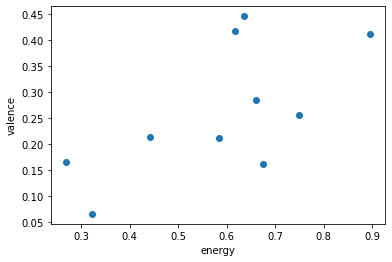

In [15]:
plt.scatter(df_cp['Energia'],df_cp['Valencia'])
plt.xlabel("energy")
plt.ylabel("valence")

Text(0, 0.5, 'valence')

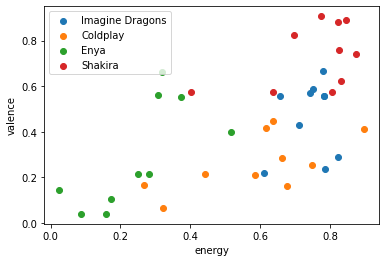

In [31]:
plt.scatter(df_id['Energia'],df_id['Valencia'],label='Imagine Dragons')
plt.scatter(df_cp['Energia'],df_cp['Valencia'],label='Coldplay')
plt.scatter(df_enya['Energia'],df_enya['Valencia'],label='Enya')
plt.scatter(df_shak['Energia'],df_shak['Valencia'],label='Shakira')
plt.legend()
plt.xlabel("energy")
plt.ylabel("valence")

## Código automatizado

In [238]:
artist = input("Digite o nome da banda/artista: ")
title = input("Digite o nome da música (ou palavra chave): ")

Digite o nome da banda/artista: Coldplay
Digite o nome da música (ou palavra chave): Head full of dreams


In [246]:
df_nova_mus = pd.DataFrame(columns=['name','artist','uri','danceability', 'acousticness', 'energy', 'instrumentalness','liveness', 'valence', 'loudness', 'speechiness', 'tempo'])

In [254]:
vetor_musicas = []
valencia = []
energia = []
nomes_mus = []

# Make your own Spotify app at https://beta.developer.spotify.com/dashboard/applications
client_id = '0cbd7765b9634995877c5d78e483bf07'
client_secret = 'f5e3b60f8471408eb6f195734ff8a775'
#title = 'Clocks'
#artist = 'Shakira'

client_credentials_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)
sp.trace=False
search_querry = artist + ' ' + title
result = sp.search(search_querry)

# Pega o primeiro resultado da busca
prim_resp = result['tracks']['items'][0]
uri = prim_resp['uri']
features = sp.audio_features(uri)
print(features[0])#['valence'])

print(prim_resp['name'])
print(prim_resp['artists'][0]['name'])
print(uri)

# Informações da música
df_nova_mus.loc[0,'name'] = prim_resp['name']
df_nova_mus.loc[0,'artist'] = prim_resp['artists'][0]['name']
df_nova_mus.loc[0,'uri'] = uri

# Puxar as features: 'danceability', 'acousticness', 'energy', 'instrumentalness','liveness', 'valence', 'loudness', 
# 'speechiness', 'tempo'
df_nova_mus.loc[0,'danceability'] = features[0]['danceability']
df_nova_mus.loc[0,'acousticness'] = features[0]['acousticness']
df_nova_mus.loc[0,'energy'] = features[0]['energy']
df_nova_mus.loc[0,'instrumentalness'] = features[0]['instrumentalness']
df_nova_mus.loc[0,'liveness'] = features[0]['liveness']
df_nova_mus.loc[0,'valence'] = features[0]['valence']
df_nova_mus.loc[0,'loudness'] = features[0]['loudness']
df_nova_mus.loc[0,'speechiness'] = features[0]['speechiness']
df_nova_mus.loc[0,'tempo'] = features[0]['tempo']

{'danceability': 0.449, 'energy': 0.92, 'key': 11, 'loudness': -4.982, 'mode': 1, 'speechiness': 0.0737, 'acousticness': 0.0021, 'instrumentalness': 0.0167, 'liveness': 0.334, 'valence': 0.0772, 'tempo': 122.984, 'type': 'audio_features', 'id': '6f49kbOuQSOsStBpyGvQfA', 'uri': 'spotify:track:6f49kbOuQSOsStBpyGvQfA', 'track_href': 'https://api.spotify.com/v1/tracks/6f49kbOuQSOsStBpyGvQfA', 'analysis_url': 'https://api.spotify.com/v1/audio-analysis/6f49kbOuQSOsStBpyGvQfA', 'duration_ms': 223773, 'time_signature': 4}
A Head Full of Dreams
Coldplay
spotify:track:6f49kbOuQSOsStBpyGvQfA


In [255]:
df_nova_mus

,name,artist,uri,danceability,acousticness,energy,instrumentalness,liveness,valence,loudness,speechiness,tempo
0,A Head Full of Dreams,Coldplay,spotify:track:6f49kbOuQSOsStBpyGvQfA,0.449,0.0021,0.92,0.0167,0.334,0.0772,-4.982,0.0737,122.984


# Modelo para reconhecimento de emoções em músicas

In [19]:
from sklearn import tree
from sklearn.model_selection import train_test_split
import xgboost as xgb

from sklearn.metrics import plot_confusion_matrix, classification_report,confusion_matrix,accuracy_score

import scikitplot as skplt

from sklearn.preprocessing import LabelEncoder,MinMaxScaler

C:\Users\sara-\anaconda3\envs\sara\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [22]:
df_ = pd.read_excel("dados_moods.xlsx", engine="openpyxl")

## Análise da base

In [23]:
df_.dtypes#head()

name                 object
album                object
artist               object
id                   object
release_date         object
popularity           object
length               object
danceability         object
acousticness         object
energy              float64
instrumentalness    float64
liveness            float64
valence             float64
loudness            float64
speechiness         float64
tempo               float64
key                 float64
time_signature        int64
mood                 object
Unnamed: 19          object
Unnamed: 20          object
Unnamed: 21         float64
Unnamed: 22          object
dtype: object

In [60]:
df_.columns

Index(['name', 'album', 'artist', 'id', 'release_date', 'popularity', 'length',
       'danceability', 'acousticness', 'energy', 'instrumentalness',
       'liveness', 'valence', 'loudness', 'speechiness', 'tempo', 'key',
       'time_signature', 'mood', 'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21',
       'Unnamed: 22'],
      dtype='object')

In [25]:
df_['mood'].value_counts()

Sad          192
Calm         192
Energetic    152
Happy        137
4              6
3              3
9              1
0              1
0.0334         1
1              1
Name: mood, dtype: int64

Text(0.5, 1.0, 'Dispersão de músicas felizes e tristes')

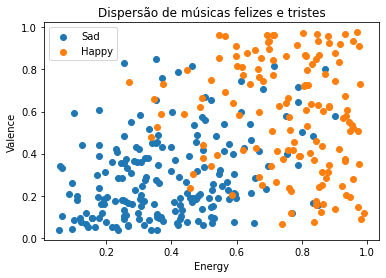

In [26]:
plt.scatter(df_[df_['mood']=='Sad']['energy'],df_[df_['mood']=='Sad']['valence'],label='Sad')
plt.scatter(df_[df_['mood']=='Happy']['energy'],df_[df_['mood']=='Happy']['valence'],label='Happy')
plt.legend()
plt.xlabel("Energy")
plt.ylabel("Valence")
plt.title("Dispersão de músicas felizes e tristes")

Text(0.5, 1.0, 'Dispersão das músicas enérgicas e calmas')

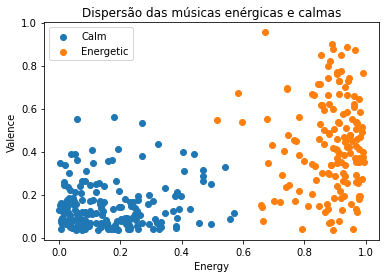

In [27]:
plt.scatter(df_[df_['mood']=='Calm']['energy'],df_[df_['mood']=='Calm']['valence'],label='Calm')
plt.scatter(df_[df_['mood']=='Energetic']['energy'],df_[df_['mood']=='Energetic']['valence'],label='Energetic')
plt.legend()
plt.xlabel("Energy")
plt.ylabel("Valence")
plt.title("Dispersão das músicas enérgicas e calmas")

## Modelagem

In [29]:
df_ = df_[(df_['mood']=='Sad') | (df_['mood']=='Calm') | (df_['mood']=='Energetic') | (df_['mood']=='Happy')]

In [30]:
# Tratar colunas

df_['danceability'] = df_['danceability'].astype("float")
df_['acousticness'] = df_['acousticness'].astype("float")

In [31]:
X = df_[['danceability', 'acousticness', 'energy', 'instrumentalness',
         'liveness', 'valence', 'loudness', 'speechiness', 'tempo']]
y = df_['mood']

In [32]:
#Encode the labels (targets)
encoder = LabelEncoder()
encoder.fit(y)
y = encoder.transform(y)

In [33]:
target = pd.DataFrame({'mood':df_['mood'].tolist(),'encode':y}).drop_duplicates().sort_values(['encode'],ascending=True)
target

,mood,encode
5,Calm,0
4,Energetic,1
0,Happy,2
1,Sad,3


In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

### Decision Tree

In [51]:
clf = tree.DecisionTreeClassifier(random_state=0,max_depth=3)

In [52]:
clf.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [53]:
y_pred = clf.predict(X_test)

C:\Users\sara-\anaconda3\envs\sara\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


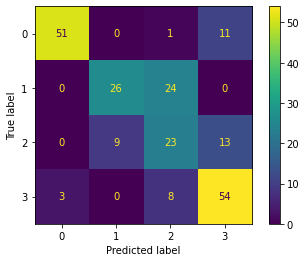

In [54]:
plot_confusion_matrix(clf, X_test, y_test)  
plt.show()

In [55]:
proba = clf.predict_proba(X_test)

In [56]:
proba

array([[0.06603774, 0.        , 0.03773585, 0.89622642],
       [0.        , 0.10714286, 0.42857143, 0.46428571],
       [0.06603774, 0.        , 0.03773585, 0.89622642],
       [0.06603774, 0.        , 0.03773585, 0.89622642],
       [0.98360656, 0.        , 0.        , 0.01639344],
       [0.06603774, 0.        , 0.03773585, 0.89622642],
       [0.98360656, 0.        , 0.        , 0.01639344],
       [0.06603774, 0.        , 0.03773585, 0.89622642],
       [0.        , 0.18181818, 0.72727273, 0.09090909],
       [0.06603774, 0.        , 0.03773585, 0.89622642],
       [0.98360656, 0.        , 0.        , 0.01639344],
       [0.        , 0.32954545, 0.54545455, 0.125     ],
       [0.06603774, 0.        , 0.03773585, 0.89622642],
       [0.06603774, 0.        , 0.03773585, 0.89622642],
       [0.98360656, 0.        , 0.        , 0.01639344],
       [0.06603774, 0.        , 0.03773585, 0.89622642],
       [0.06603774, 0.        , 0.03773585, 0.89622642],
       [0.        , 0.10714286,

In [61]:
y_pred

array([3, 3, 3, 3, 0, 3, 0, 3, 2, 3, 0, 2, 3, 3, 0, 3, 3, 3, 1, 2, 2, 0,
       3, 0, 0, 0, 2, 2, 1, 0, 0, 1, 2, 0, 0, 1, 3, 3, 1, 2, 0, 0, 2, 3,
       2, 0, 0, 0, 3, 2, 1, 0, 3, 2, 2, 3, 0, 1, 1, 2, 0, 2, 0, 1, 2, 3,
       2, 3, 3, 2, 1, 3, 0, 3, 0, 3, 3, 3, 3, 2, 1, 2, 1, 3, 2, 0, 1, 2,
       3, 0, 3, 3, 0, 1, 2, 2, 3, 3, 0, 0, 2, 0, 2, 0, 3, 2, 1, 2, 1, 3,
       3, 0, 2, 3, 0, 1, 3, 0, 3, 3, 1, 0, 3, 2, 1, 1, 3, 3, 3, 1, 3, 0,
       1, 1, 2, 3, 2, 3, 3, 2, 2, 0, 3, 2, 1, 1, 3, 0, 0, 1, 3, 0, 2, 3,
       1, 2, 3, 1, 3, 3, 2, 3, 2, 3, 2, 2, 0, 3, 1, 2, 0, 2, 3, 3, 2, 2,
       0, 3, 0, 2, 2, 1, 1, 0, 2, 3, 3, 2, 3, 0, 3, 3, 3, 3, 3, 0, 3, 2,
       0, 2, 2, 0, 1, 1, 0, 3, 0, 3, 3, 3, 3, 2, 2, 0, 1, 2, 2, 0, 0, 3,
       3, 0, 1])

In [57]:
#skplt.metrics.plot_ks_statistic(y_test, proba)

In [58]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.81      0.87        63
           1       0.74      0.52      0.61        50
           2       0.41      0.51      0.46        45
           3       0.69      0.83      0.76        65

    accuracy                           0.69       223
   macro avg       0.70      0.67      0.67       223
weighted avg       0.72      0.69      0.70       223



### XGBoost

In [90]:
X_train.dtypes

danceability        float64
acousticness        float64
energy              float64
instrumentalness    float64
liveness            float64
valence             float64
loudness            float64
speechiness         float64
tempo               float64
dtype: object

In [94]:
model = xgb.XGBClassifier()
model.fit(X_train, y_train)
 
# Predicting the Test set results
y_pred = model.predict(X_test)
 
# Making the Confusion Matrix
confusion_matrix(y_test, y_pred)

C:\Users\sara-\anaconda3\envs\sara\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\sara-\anaconda3\envs\sara\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[23:58:48] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


array([[57,  0,  0,  6],
       [ 0, 35, 13,  2],
       [ 0, 12, 30,  3],
       [ 8,  0,  4, 53]], dtype=int64)

In [95]:
y_pred = model.predict(X_test)
#predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 78.48%


In [96]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.90      0.89        63
           1       0.74      0.70      0.72        50
           2       0.64      0.67      0.65        45
           3       0.83      0.82      0.82        65

    accuracy                           0.78       223
   macro avg       0.77      0.77      0.77       223
weighted avg       0.78      0.78      0.78       223



C:\Users\sara-\anaconda3\envs\sara\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


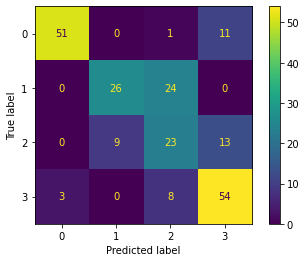

In [97]:
plot_confusion_matrix(clf, X_test, y_test)  
plt.show()

In [98]:
proba = model.predict_proba(X_test)

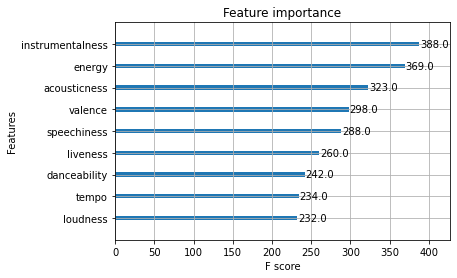

In [100]:
from xgboost import plot_importance
plot_importance(model)
plt.show()

### Neural network

In [67]:
from sklearn.neural_network import MLPClassifier
#X = [[0., 0.], [1., 1.]]
#y = [0, 1]
nn = MLPClassifier(solver='lbfgs', alpha=1e-5,
                    hidden_layer_sizes=(5, 2), random_state=1)

nn.fit(X_train, y_train)

C:\Users\sara-\anaconda3\envs\sara\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPClassifier(alpha=1e-05, hidden_layer_sizes=(5, 2), random_state=1,
              solver='lbfgs')

In [69]:
y_pred = nn.predict(X_test)

In [70]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.29      0.83      0.43        63
           1       0.00      0.00      0.00        50
           2       0.20      0.20      0.20        45
           3       0.00      0.00      0.00        65

    accuracy                           0.27       223
   macro avg       0.12      0.26      0.16       223
weighted avg       0.12      0.27      0.16       223



C:\Users\sara-\anaconda3\envs\sara\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sara-\anaconda3\envs\sara\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sara-\anaconda3\envs\sara\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Deep learning

In [224]:
#Libraries to create the Multi-class Neural Network
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
#Import tensorflow and disable the v2 behavior and eager mode
import tensorflow as tf
tf.compat.v1.disable_eager_execution()
tf.compat.v1.disable_v2_behavior()

In [225]:
#Function that creates the structure of the Neural Network
def base_model():
    #Create the model
    model = Sequential()
    #Add 1 layer with 8 nodes,input of 4 dim with relu function
    model.add(Dense(8,input_dim=10,activation='relu'))
    #Add 1 layer with output 3 and softmax function
    model.add(Dense(4,activation='softmax'))
    #Compile the model using logistic loss function and adam     optimizer, accuracy correspond to the metric displayed
    model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
    return model
#Configure the estimator with 300 epochs and 200 batchs. the build_fn takes the function defined above.
estimator = KerasClassifier(build_fn=base_model,epochs=300,
                            batch_size=200)

C:\Users\sara-\AppData\Local\Temp\ipykernel_51888\1988398375.py:13: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  estimator = KerasClassifier(build_fn=base_model,epochs=300,


In [226]:
#Library to evaluate the model
from sklearn.model_selection import cross_val_score, KFold

In [227]:
#Evaluate the model using KFold cross validation
kfold = KFold(n_splits=10,shuffle=True)
results = cross_val_score(estimator,X,y,cv=kfold)
print("%.2f%% (%.2f%%)" % (results.mean()*100,results.std()*100))

nan% (nan%)


C:\Users\sara-\anaconda3\envs\sara\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
10 fits failed out of a total of 10.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\sara-\anaconda3\envs\sara\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\sara-\anaconda3\envs\sara\lib\site-packages\keras\wrappers\scikit_learn.py", line 236, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "C:\Users\sara-\anaconda3\envs\sara\lib\site-packages\keras\wrappers\scikit_learn.py", line 164, in fit
    histo

### Salvar modelo final (em arquivo)

In [260]:
import pickle

with open("modelo.pkl", "wb") as f:
    pickle.dump(model, f)

In [261]:
with open("modelo.pkl", "rb") as f:
    model = pickle.load(f)

## Classificação de novas músicas

In [256]:
list(df_nova_mus.iloc[0])

['A Head Full of Dreams',
 'Coldplay',
 'spotify:track:6f49kbOuQSOsStBpyGvQfA',
 0.449,
 0.0021,
 0.92,
 0.0167,
 0.334,
 0.0772,
 -4.982,
 0.0737,
 122.984]

In [257]:
new = df_nova_mus[['danceability', 'acousticness', 'energy', 'instrumentalness',
                   'liveness', 'valence', 'loudness', 'speechiness', 'tempo']]

In [271]:
type(clf.predict(new)[0])

numpy.int32

# Main

In [280]:
if __name__ == "__main__":
    # Escolher música de preferência
    df_feat = features_musicais()
    
    # Carregar modelo escolhido
    mod = carregar_modelo("modelo")
    
    # Classificar música escolhida
    mood = classificar_musica(mod,df_feat)

Digite o nome da banda/artista: abba
Digite o nome da música (ou palavra chave): mamma mia
Nome da música selecionada:  Mamma Mia
Nome do artista:  ABBA
Sua música foi classificada como:  Happy


In [279]:
df_

,name,album,artist,id,release_date,popularity,length,danceability,acousticness,energy,...,loudness,speechiness,tempo,key,time_signature,mood,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22
0,1999,1999,Prince,2H7PHVdQ3mXqEHXcvclTB0,1982-10-27 00:00:00,68,379266,0.866,0.13700,0.7300,...,-8201.0,0.0767,1.185230e+05,5.0,4,Happy,NaN,NaN,NaN,NaN
1,23,23,Blonde Redhead,4HIwL9ii9CcXpTOTzMq0MP,2007-04-16 00:00:00,43,318800,0.381,0.01890,0.8320,...,-5069.0,0.0492,1.202550e+05,8.0,4,Sad,NaN,NaN,NaN,NaN
2,9 Crimes,9,Damien Rice,5GZEeowhvSieFDiR8fQ2im,2006-11-06 00:00:00,60,217946,0.346,0.91300,0.1390,...,-15326.0,0.0321,1.361680e+05,0.0,4,Sad,NaN,NaN,NaN,NaN
3,99 Luftballons,99 Luftballons,Nena,6HA97v4wEGQ5TUClRM0XLc,1984-08-21 00:00:00,2,233000,0.466,0.08900,0.4380,...,-12858.0,0.0608,1.931000e+02,4.0,4,Happy,NaN,NaN,NaN,NaN
4,A Boy Brushed Red Living In Black And White,They're Only Chasing Safety,Underoath,47IWLfIKOKhFnz1FUEUIkE,2004-01-01 00:00:00,60,268000,0.419,0.00171,0.9320,...,-3604.0,0.1060,1.698810e+16,1.0,4,Energetic,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
681,windcatcher,windcatcher,Leo Nocta,59VApBbrS2IADQk4ml5mdo,2020-06-19 00:00:00,36,123066,0.402,0.96100,0.2360,...,-20615.0,0.0603,1.297360e+05,0.0,3,Calm,NaN,NaN,NaN,NaN
682,yellow is the color of her eyes,yellow is the color of her eyes,Soccer Mommy,4D3nttJPU6L0M2epr7sId6,2019-11-19 00:00:00,5,435080,0.452,0.75700,0.5150,...,-7351.0,0.0255,8.053700e+15,11.0,4,Sad,NaN,NaN,NaN,NaN
683,you broke me first,you broke me first,Tate McRae,45bE4HXI0AwGZXfZtMp8JR,2020-04-17 00:00:00,87,169265,0.642,0.78600,0.3740,...,-9386.0,0.0545,1.240990e+05,4.0,4,Sad,NaN,NaN,NaN,NaN
684,you were good to me,brent,Jeremy Zucker,4CxFN5zON70B3VOPBYbd6P,2019-05-03 00:00:00,76,219146,0.561,0.91300,0.0848,...,-15099.0,0.0404,1.021280e+05,2.0,4,Sad,NaN,NaN,NaN,NaN
